In [2]:
def suma_mat(A,B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = A[i][j]+B[i][j]
    return C

def resta_mat(A,B):
    n = len(A)
    C = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = A[i][j]-B[i][j]
    return C
            
def mult_strassen(A,B):
    n = len(A)
    extend = False
    if n == 1:
        return [[A[0][0]*B[0][0]]]
    else:
        #Caso n impar, completamos con para que la dimensión sea potencia de 2
        if n%2 == 1:
            extend = True
            #m = 1<<(n-1).bit_length()
            A_new = [[0 for _ in range(n+1)] for _ in range(n+1)]
            B_new = [[0 for _ in range(n+1)] for _ in range(n+1)]
            for i in range(n):
                for j in range(n):
                    A_new[i][j] = A[i][j]
                    B_new[i][j] = B[i][j]
            n += 1
        else:
            A_new = A
            B_new = B
            
        n_new = n//2
        A11 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        A12 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        A21 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        A22 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        B11 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        B12 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        B21 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        B22 = [[0 for _ in range(n_new)] for _ in range(n_new)]
        
        #Rompemos cada matriz en 4 submatrices
        for i in range(n_new):
            for j in range(n_new):
                A11[i][j] = A_new[i][j]
                B11[i][j] = B_new[i][j]
                A12[i][j] = A_new[i][j+n_new]
                B12[i][j] = B_new[i][j+n_new]
                A21[i][j] = A_new[i+n_new][j]
                B21[i][j] = B_new[i+n_new][j]
                A22[i][j] = A_new[i+n_new][j+n_new]
                B22[i][j] = B_new[i+n_new][j+n_new]
        
        A_aux = suma_mat(A11,A22)
        B_aux = suma_mat(B11,B22)
        M1 = mult_strassen(A_aux, B_aux)
        
        A_aux = suma_mat(A21,A22)
        B_aux = B11
        M2 = mult_strassen(A_aux,B11)

        A_aux = A11
        B_aux = resta_mat(B12,B22)
        M3 = mult_strassen(A11,B_aux)

        A_aux = A22
        B_aux = resta_mat(B21,B11)
        M4 = mult_strassen(A22,B_aux)
        
        A_aux = suma_mat(A11,A12)
        B_aux = B22
        M5 = mult_strassen(A_aux,B22)
        
        A_aux = resta_mat(A21,A11)
        B_aux = suma_mat(B11,B12)
        M6 = mult_strassen(A_aux,B_aux)
        
        A_aux = resta_mat(A12,A22)
        B_aux = suma_mat(B21,B22)
        M7 = mult_strassen(A_aux,B_aux)
        
        M_aux1 = suma_mat(M1,M4)
        M_aux2 = resta_mat(M_aux1,M5)
        C11 = suma_mat(M_aux2,M7)
        
        C12 = suma_mat(M3,M5)
        C21 = suma_mat(M2,M4)
        
        M_aux1 = resta_mat(M1,M2)
        M_aux2 = suma_mat(M3,M6)
        C22 = suma_mat(M_aux1,M_aux2)
        
        #Reconstruimos la matriz C
        C = [[0]*n for _ in range(n)]

        for i in range(n_new):
            for j in range(n_new):
                C[i][j] = C11[i][j]
                C[i][j+n_new] = C12[i][j]
                C[i+n_new][j] = C21[i][j]
                C[i+n_new][j+n_new] = C22[i][j]
                
        #Quitamos la fila y columna de ceros en caso de haberlas añadido
        if extend:
            C = C[:n-1]
            for i in range(n-1):
                C[i] = C[i][:n-1]
        
        return C 

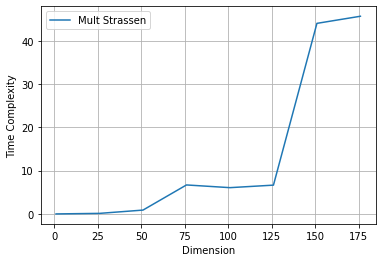

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt

sizes = []
times = []
for n in range(1,201, 25):
    sizes.append(n)
    A = []
    B = []
    for i in range(n):
        a = np.random.uniform(0, 100, n).tolist()
        A.append(a)
        b = np.random.uniform(0, 100, n).tolist()
        B.append(b)
    
    times_size_n = []
    for m in range(5):
        start = time.perf_counter()
        mult_strassen(A,B)
        end = time.perf_counter()
        times_size_n.append(end-start)
        
    media_tiempo = sum(times_size_n)/5
    times.append(media_tiempo)
    
plt.xlabel('Dimension')
plt.ylabel('Time Complexity')
plt.plot(sizes, times, label ='Mult Strassen')
plt.grid()
plt.legend()
plt.show()